# Customer Churn Prediction using Decision Tree
## Telecom Company Analysis


🚀 CUSTOMER CHURN PREDICTION MODEL
✅ All libraries imported successfully!
📍 Running in Google Colab environment

📊 STEP 2: Creating Synthetic Dataset...
----------------------------------------
✅ Dataset created with 1000 customers
📈 Churn distribution:
Churn
Yes    646
No     354
Name: count, dtype: int64
📊 Overall churn rate: 64.60%

📋 Sample of the dataset:


,CustomerID,Age,MonthlyCharge,CustomerServiceCalls,Churn
0,1,56,68.98,2,No
1,2,69,117.45,3,Yes
2,3,46,71.09,4,No
3,4,32,127.79,5,Yes
4,5,60,93.98,2,No
5,6,25,28.26,1,Yes
6,7,78,24.79,3,No
7,8,38,37.40,4,No
8,9,56,21.78,3,No
9,10,75,29.80,2,Yes



📊 STEP 3: Data Exploration

📏 Dataset shape: (1000, 5)
📋 Columns: ['CustomerID', 'Age', 'MonthlyCharge', 'CustomerServiceCalls', 'Churn']
🔍 Missing values: 0

📈 Descriptive Statistics:


,CustomerID,Age,MonthlyCharge,CustomerServiceCalls
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,86.399090,4.496000
std,288.819436,18.114267,36.962066,2.804255
min,1.000000,18.000000,20.030000,0.000000
25%,250.750000,35.000000,55.262500,2.000000
50%,500.500000,50.000000,88.940000,4.000000
75%,750.250000,66.000000,117.510000,7.000000
max,1000.000000,79.000000,149.920000,9.000000


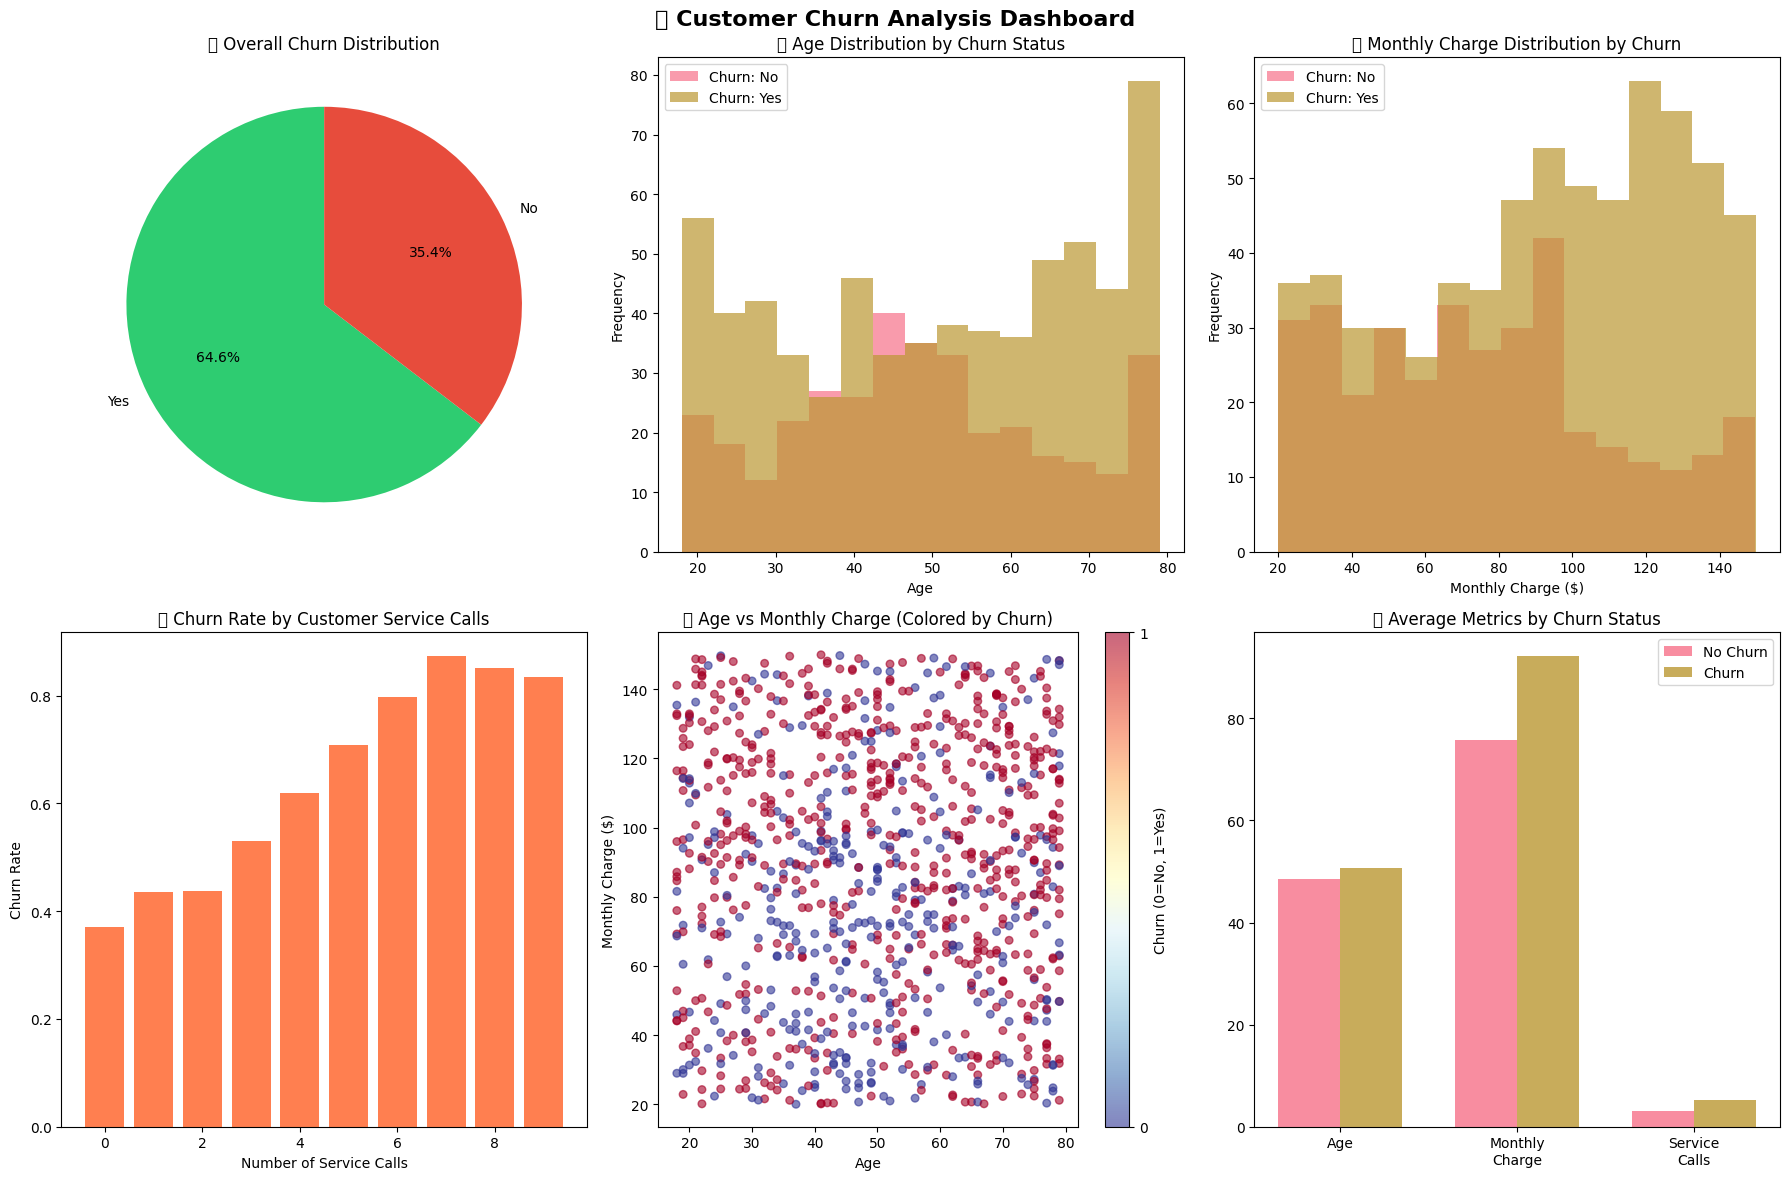


⚙️ STEP 4: Data Preparation
🎯 Features (X): ['Age', 'MonthlyCharge', 'CustomerServiceCalls']
🎯 Target (y): Churn prediction
📐 Feature matrix shape: (1000, 3)
📐 Target vector shape: (1000,)

🚂 Training set: 800 samples (80.0%)
🧪 Testing set: 200 samples (20.0%)
📊 Training churn rate: 64.62%
📊 Testing churn rate: 64.50%

🌳 STEP 5: Building Decision Tree Model
🔄 Training the Decision Tree model...
✅ Model training completed!

📈 STEP 6: Model Evaluation
🎯 Model Accuracy: 0.7600 (76.00%)

📊 Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.65      0.70      0.68        71
         Yes       0.83      0.79      0.81       129

    accuracy                           0.76       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.77      0.76      0.76       200


📋 Confusion Matrix:
[[ 50  21]
 [ 27 102]]


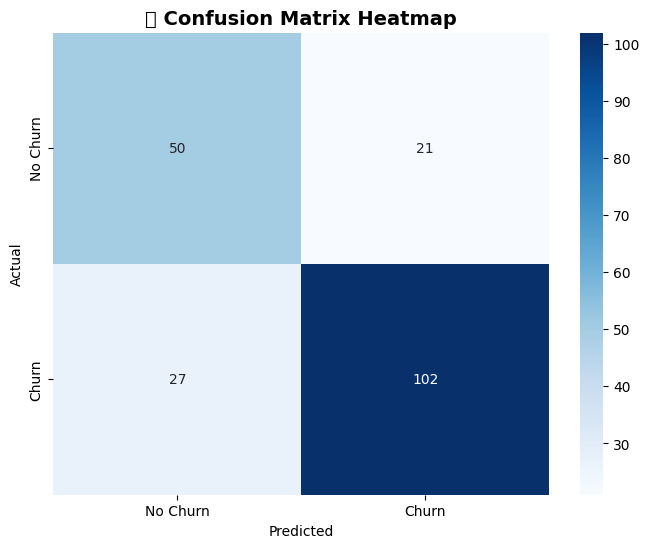


🔍 STEP 7: Feature Importance Analysis
📊 Feature Importance Ranking:
  CustomerServiceCalls: 0.4567 (45.7%)
  MonthlyCharge: 0.3698 (37.0%)
  Age: 0.1735 (17.3%)


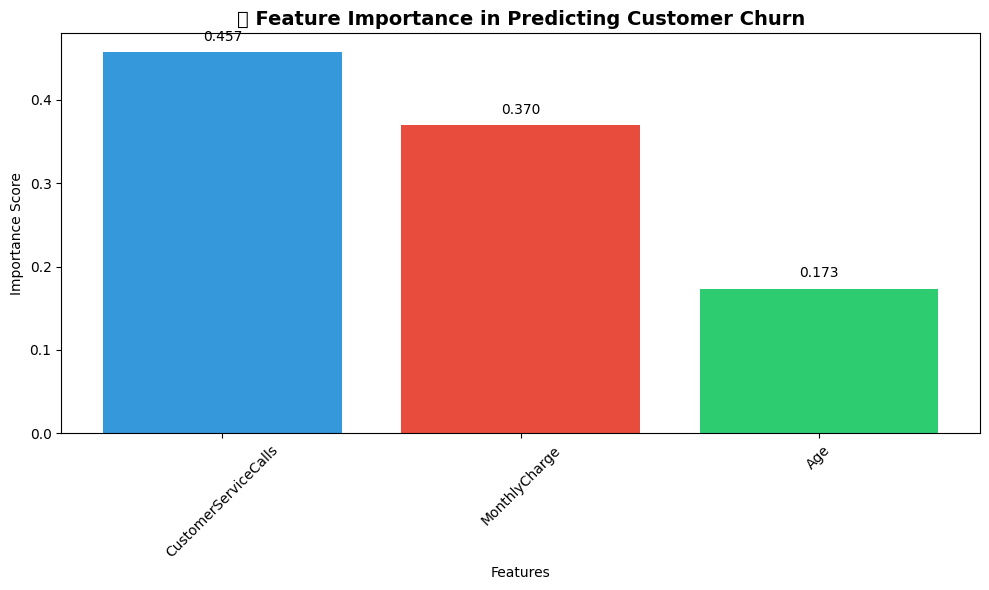


🌳 STEP 8: Decision Tree Visualization


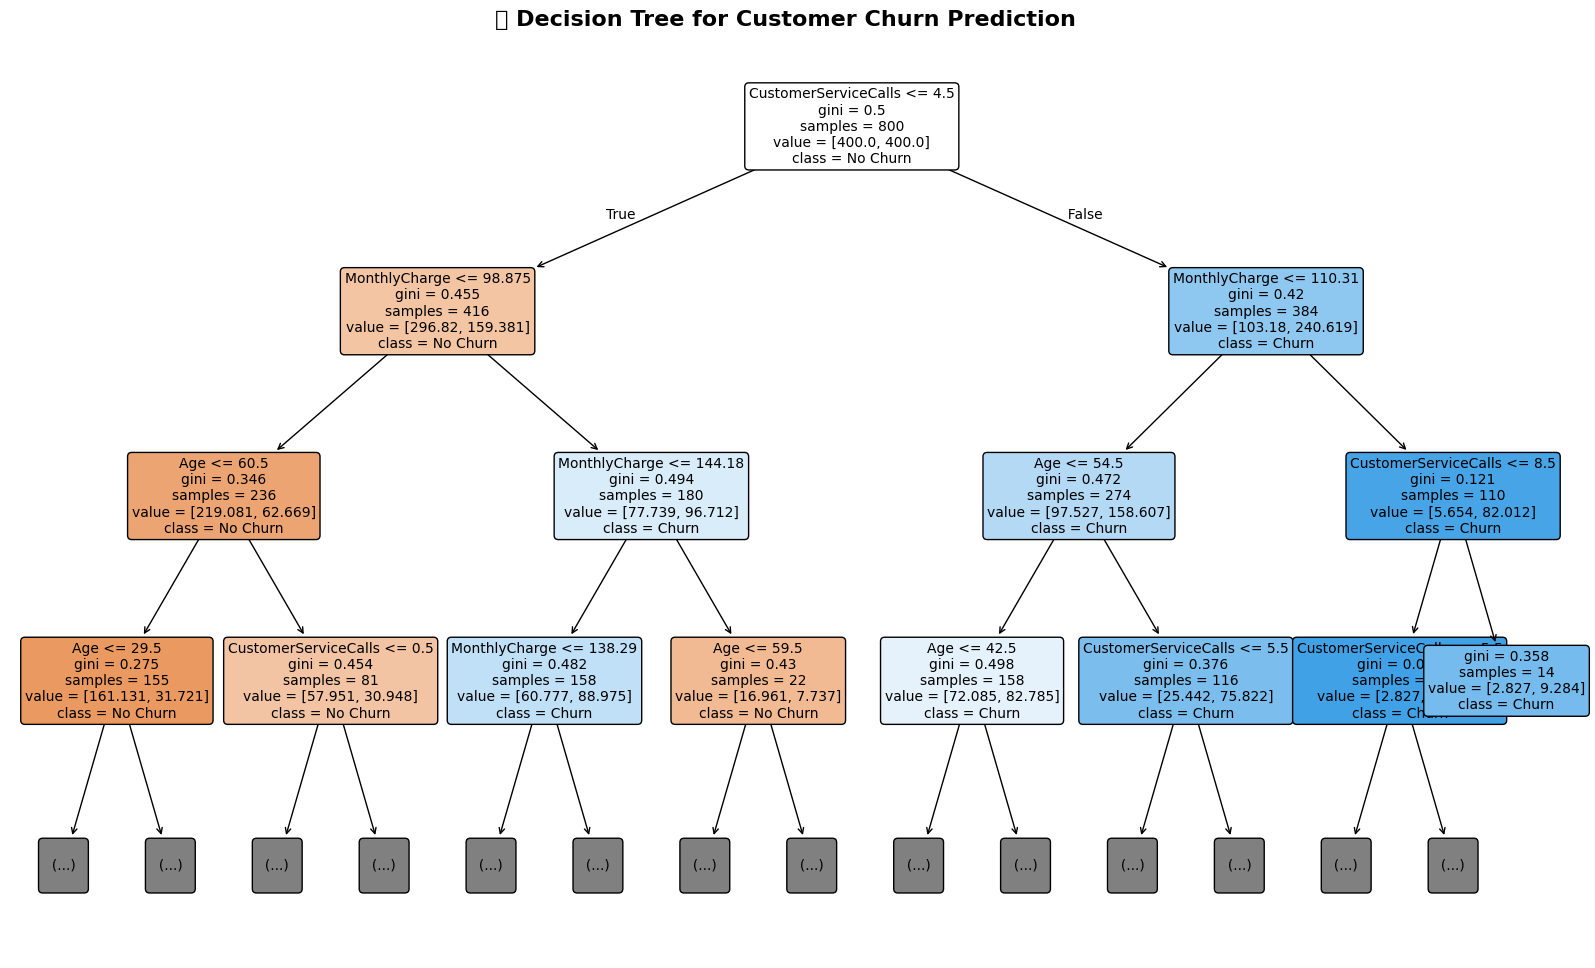


💡 STEP 9: Business Insights & Recommendations

🔍 KEY INSIGHTS FROM THE ANALYSIS:
--------------------------------------------------
🏆 Most Important Factor: CustomerServiceCalls (45.7% importance)
1. CustomerServiceCalls: 0.457 importance
2. MonthlyCharge: 0.370 importance
3. Age: 0.173 importance

💼 ACTIONABLE BUSINESS RECOMMENDATIONS:
--------------------------------------------------
📞 CUSTOMER SERVICE OPTIMIZATION:
   • Implement proactive support for customers with >3 service calls
   • Create escalation procedures for frequent callers
   • Monitor call patterns to identify at-risk customers

💰 PRICING STRATEGY REFINEMENT:
   • Offer loyalty discounts for high-value customers (>$100/month)
   • Create tiered pricing with better value propositions
   • Implement retention pricing for at-risk customers

🎯 TARGETED RETENTION CAMPAIGNS:
   • Focus on customers aged 18-30 and 60+ (high churn segments)
   • Prioritize customers with multiple service calls
   • Develop age-specific rete

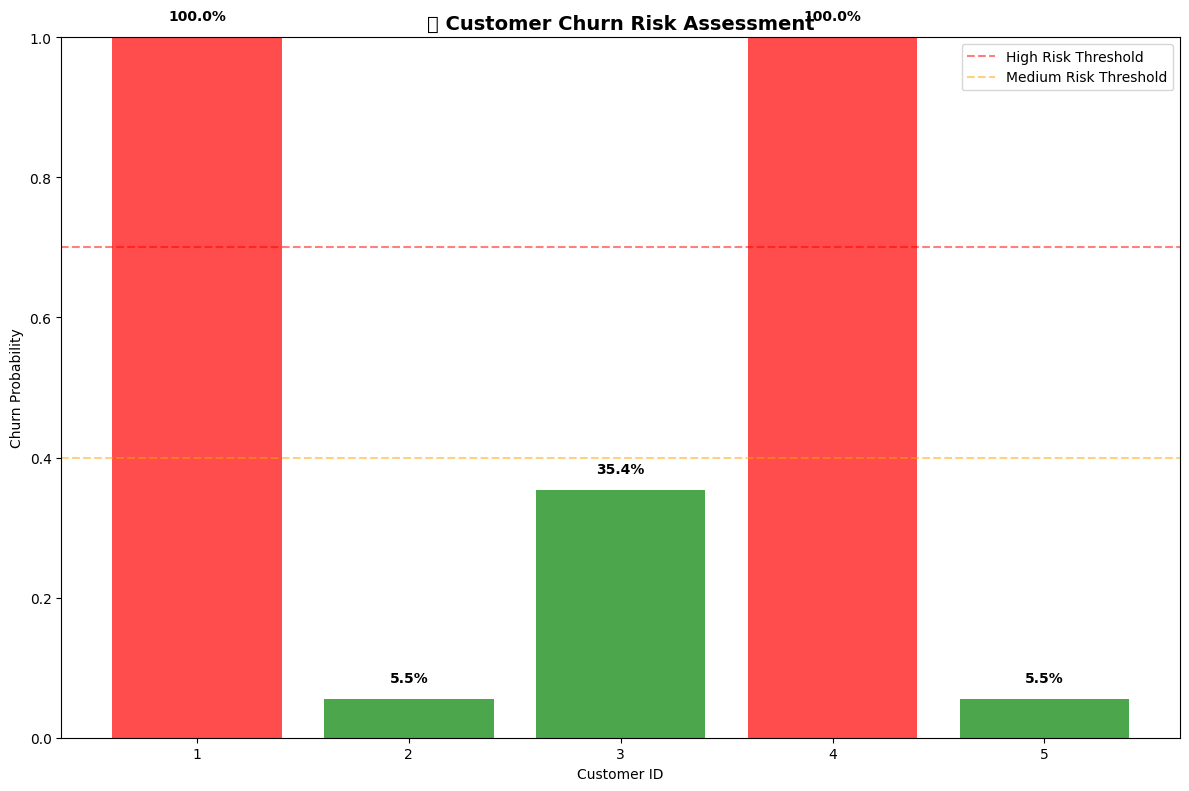


🎉 ANALYSIS COMPLETE!

📋 SUMMARY OF RESULTS:
   • Model Accuracy: 76.00%
   • Dataset Size: 1,000 customers
   • Churn Rate: 64.60%
   • Most Important Factor: CustomerServiceCalls

🚀 NEXT STEPS FOR IMPLEMENTATION:
   1. 📊 Validate model with real customer data
   2. 🖥️ Implement automated scoring dashboard
   3. 🚨 Create alert system for high-risk customers
   4. 📈 Measure retention campaign effectiveness
   5. 🔄 Retrain model quarterly with new data
   6. 🎯 A/B test retention strategies on high-risk segments

✅ Your churn prediction model is ready for business use!
🔗 Save this notebook to your Google Drive for future reference
📧 Share insights with your marketing and customer success teams


In [ ]:
# Customer Churn Prediction using Decision Tree - Google Colab Version
# Optimized for Google Colab environment

# Step 1: Import all necessary libraries (pre-installed in Colab)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("🚀 CUSTOMER CHURN PREDICTION MODEL")
print("="*60)
print("✅ All libraries imported successfully!")
print("📍 Running in Google Colab environment")

# Step 2: Create the Synthetic Dataset
print("\n📊 STEP 2: Creating Synthetic Dataset...")
print("-" * 40)

# Generate synthetic data with realistic patterns
n_customers = 1000

# Generate customer data
customer_data = {
    'CustomerID': range(1, n_customers + 1),
    'Age': np.random.randint(18, 80, n_customers),
    'MonthlyCharge': np.round(np.random.uniform(20, 150, n_customers), 2),
    'CustomerServiceCalls': np.random.randint(0, 10, n_customers),
}

# Create DataFrame
df = pd.DataFrame(customer_data)

# Create realistic churn patterns
churn_prob = np.zeros(n_customers)
for i in range(n_customers):
    prob = 0.1  # Base probability

    # Age factor - younger and older customers more likely to churn
    if df.loc[i, 'Age'] < 30 or df.loc[i, 'Age'] > 60:
        prob += 0.2

    # Monthly charge factor - expensive plans increase churn
    if df.loc[i, 'MonthlyCharge'] > 100:
        prob += 0.3

    # Customer service calls - more calls = higher churn risk
    prob += df.loc[i, 'CustomerServiceCalls'] * 0.08

    churn_prob[i] = min(prob, 0.9)  # Cap at 90%

# Generate churn labels
df['Churn'] = np.random.binomial(1, churn_prob, n_customers)
df['Churn'] = df['Churn'].map({0: 'No', 1: 'Yes'})

print(f"✅ Dataset created with {len(df)} customers")
print(f"📈 Churn distribution:")
print(df['Churn'].value_counts())
print(f"📊 Overall churn rate: {(df['Churn'] == 'Yes').mean():.2%}")

# Display sample data
print("\n📋 Sample of the dataset:")
display(df.head(10))

# Step 3: Data Exploration and Visualization
print("\n" + "="*60)
print("📊 STEP 3: Data Exploration")
print("="*60)

# Basic statistics
print(f"\n📏 Dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print(f"🔍 Missing values: {df.isnull().sum().sum()}")

print("\n📈 Descriptive Statistics:")
display(df.describe())

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔍 Customer Churn Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Churn Distribution (Pie Chart)
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
axes[0, 0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[0, 0].set_title('🎯 Overall Churn Distribution')

# 2. Age Distribution by Churn
for churn_status in ['No', 'Yes']:
    ages = df[df['Churn'] == churn_status]['Age']
    axes[0, 1].hist(ages, alpha=0.7, label=f'Churn: {churn_status}', bins=15)
axes[0, 1].set_title('👥 Age Distribution by Churn Status')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# 3. Monthly Charge Distribution by Churn
for churn_status in ['No', 'Yes']:
    charges = df[df['Churn'] == churn_status]['MonthlyCharge']
    axes[0, 2].hist(charges, alpha=0.7, label=f'Churn: {churn_status}', bins=15)
axes[0, 2].set_title('💰 Monthly Charge Distribution by Churn')
axes[0, 2].set_xlabel('Monthly Charge ($)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# 4. Customer Service Calls vs Churn
service_call_churn = df.groupby('CustomerServiceCalls')['Churn'].apply(lambda x: (x=='Yes').mean())
axes[1, 0].bar(service_call_churn.index, service_call_churn.values, color='coral')
axes[1, 0].set_title('📞 Churn Rate by Customer Service Calls')
axes[1, 0].set_xlabel('Number of Service Calls')
axes[1, 0].set_ylabel('Churn Rate')

# 5. Age vs Monthly Charge Scatter (colored by churn)
scatter = axes[1, 1].scatter(df['Age'], df['MonthlyCharge'],
                            c=df['Churn'].map({'No': 0, 'Yes': 1}),
                            cmap='RdYlBu_r', alpha=0.6, s=30)
axes[1, 1].set_title('🔄 Age vs Monthly Charge (Colored by Churn)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Monthly Charge ($)')
plt.colorbar(scatter, ax=axes[1, 1], ticks=[0, 1], label='Churn (0=No, 1=Yes)')

# 6. Average metrics by churn status
avg_metrics = df.groupby('Churn')[['Age', 'MonthlyCharge', 'CustomerServiceCalls']].mean()
x = np.arange(len(avg_metrics.columns))
width = 0.35
axes[1, 2].bar(x - width/2, avg_metrics.loc['No'], width, label='No Churn', alpha=0.8)
axes[1, 2].bar(x + width/2, avg_metrics.loc['Yes'], width, label='Churn', alpha=0.8)
axes[1, 2].set_title('📊 Average Metrics by Churn Status')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['Age', 'Monthly\nCharge', 'Service\nCalls'])
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Step 4: Data Preparation
print("\n" + "="*60)
print("⚙️ STEP 4: Data Preparation")
print("="*60)

# Prepare features and target
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

print(f"🎯 Features (X): {list(X.columns)}")
print(f"🎯 Target (y): Churn prediction")
print(f"📐 Feature matrix shape: {X.shape}")
print(f"📐 Target vector shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🚂 Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df)*100):.1f}%)")
print(f"🧪 Testing set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df)*100):.1f}%)")
print(f"📊 Training churn rate: {(y_train == 'Yes').mean():.2%}")
print(f"📊 Testing churn rate: {(y_test == 'Yes').mean():.2%}")

# Step 5: Build and Train Decision Tree Model
print("\n" + "="*60)
print("🌳 STEP 5: Building Decision Tree Model")
print("="*60)

# Create decision tree with optimal parameters
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,           # Prevent overfitting
    min_samples_split=20,  # Minimum samples to split
    min_samples_leaf=10,   # Minimum samples in leaf
    class_weight='balanced' # Handle class imbalance
)

print("🔄 Training the Decision Tree model...")
dt_classifier.fit(X_train, y_train)
print("✅ Model training completed!")

# Step 6: Model Evaluation
print("\n" + "="*60)
print("📈 STEP 6: Model Evaluation")
print("="*60)

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.4f} ({accuracy:.2%})")

# Detailed classification report
print(f"\n📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n📋 Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('🔥 Confusion Matrix Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 7: Feature Importance Analysis
print("\n" + "="*60)
print("🔍 STEP 7: Feature Importance Analysis")
print("="*60)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("📊 Feature Importance Ranking:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f} ({row['Importance']:.1%})")

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importance['Feature'], feature_importance['Importance'],
               color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('🏆 Feature Importance in Predicting Customer Churn', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 8: Decision Tree Visualization
print("\n" + "="*60)
print("🌳 STEP 8: Decision Tree Visualization")
print("="*60)

plt.figure(figsize=(20, 12))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limit depth for readability
plt.title('🌳 Decision Tree for Customer Churn Prediction', fontsize=16, fontweight='bold')
plt.show()

# Step 9: Business Insights and Recommendations
print("\n" + "="*60)
print("💡 STEP 9: Business Insights & Recommendations")
print("="*60)

print("\n🔍 KEY INSIGHTS FROM THE ANALYSIS:")
print("-" * 50)

# Analyze most important factors
top_feature = feature_importance.iloc[0]
print(f"🏆 Most Important Factor: {top_feature['Feature']} ({top_feature['Importance']:.1%} importance)")

for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Importance']:.3f} importance")

print("\n💼 ACTIONABLE BUSINESS RECOMMENDATIONS:")
print("-" * 50)

recommendations = [
    "📞 CUSTOMER SERVICE OPTIMIZATION:",
    "   • Implement proactive support for customers with >3 service calls",
    "   • Create escalation procedures for frequent callers",
    "   • Monitor call patterns to identify at-risk customers",
    "",
    "💰 PRICING STRATEGY REFINEMENT:",
    "   • Offer loyalty discounts for high-value customers (>$100/month)",
    "   • Create tiered pricing with better value propositions",
    "   • Implement retention pricing for at-risk customers",
    "",
    "🎯 TARGETED RETENTION CAMPAIGNS:",
    "   • Focus on customers aged 18-30 and 60+ (high churn segments)",
    "   • Prioritize customers with multiple service calls",
    "   • Develop age-specific retention strategies",
    "",
    "📊 PREDICTIVE INTERVENTION SYSTEM:",
    "   • Use this model to score all customers monthly",
    "   • Create automated alerts for high-risk customers",
    "   • Implement early warning dashboard for retention team"
]

for rec in recommendations:
    print(rec)

# Step 10: Customer Risk Scoring Simulation
print("\n" + "="*60)
print("🚀 STEP 10: Customer Risk Scoring Simulation")
print("="*60)

# Create sample new customers for scoring
new_customers = pd.DataFrame({
    'Age': [25, 45, 65, 35, 55],
    'MonthlyCharge': [120, 80, 95, 140, 70],
    'CustomerServiceCalls': [5, 1, 3, 7, 0]
})

# Predict churn probability
churn_probabilities = dt_classifier.predict_proba(new_customers)[:, 1]
predictions = dt_classifier.predict(new_customers)

# Assign risk levels
def get_risk_level(prob):
    if prob > 0.7:
        return "🔴 HIGH RISK"
    elif prob > 0.4:
        return "🟡 MEDIUM RISK"
    else:
        return "🟢 LOW RISK"

risk_levels = [get_risk_level(p) for p in churn_probabilities]

print("🎯 CUSTOMER RISK ASSESSMENT SIMULATION:")
print("-" * 50)

for i, (_, customer) in enumerate(new_customers.iterrows()):
    print(f"\n👤 Customer {i+1}:")
    print(f"   Age: {customer['Age']} years")
    print(f"   Monthly Charge: ${customer['MonthlyCharge']:.2f}")
    print(f"   Service Calls: {customer['CustomerServiceCalls']}")
    print(f"   Churn Probability: {churn_probabilities[i]:.2%}")
    print(f"   Prediction: {predictions[i]}")
    print(f"   Risk Level: {risk_levels[i]}")

# Create risk assessment visualization
plt.figure(figsize=(12, 8))
colors = ['red' if p > 0.7 else 'orange' if p > 0.4 else 'green' for p in churn_probabilities]
bars = plt.bar(range(1, len(new_customers)+1), churn_probabilities, color=colors, alpha=0.7)
plt.title('🎯 Customer Churn Risk Assessment', fontsize=14, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Churn Probability')
plt.ylim(0, 1)

# Add probability labels on bars
for i, (bar, prob) in enumerate(zip(bars, churn_probabilities)):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

# Add risk level legend
plt.axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='High Risk Threshold')
plt.axhline(y=0.4, color='orange', linestyle='--', alpha=0.5, label='Medium Risk Threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("🎉 ANALYSIS COMPLETE!")
print("="*60)

print("\n📋 SUMMARY OF RESULTS:")
print(f"   • Model Accuracy: {accuracy:.2%}")
print(f"   • Dataset Size: {len(df):,} customers")
print(f"   • Churn Rate: {(df['Churn'] == 'Yes').mean():.2%}")
print(f"   • Most Important Factor: {feature_importance.iloc[0]['Feature']}")

print("\n🚀 NEXT STEPS FOR IMPLEMENTATION:")
next_steps = [
    "1. 📊 Validate model with real customer data",
    "2. 🖥️ Implement automated scoring dashboard",
    "3. 🚨 Create alert system for high-risk customers",
    "4. 📈 Measure retention campaign effectiveness",
    "5. 🔄 Retrain model quarterly with new data",
    "6. 🎯 A/B test retention strategies on high-risk segments"
]

for step in next_steps:
    print(f"   {step}")

print(f"\n✅ Your churn prediction model is ready for business use!")
print(f"🔗 Save this notebook to your Google Drive for future reference")
print(f"📧 Share insights with your marketing and customer success teams")